# Сборный проект №1.

**Описание проекта.**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

 - `Name` — название игры
 - `Platform` — платформа
 - `Year_of_Release` — год выпуска
 - `Genre — жанр игры`
 - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
 - `EU_sales` — продажи в Европе (миллионы проданных копий)
 - `JP_sales` — продажи в Японии (миллионы проданных копий)
 - `Other_sales` — продажи в других странах (миллионы проданных копий)
 - `Critic_Score` — оценка критиков (максимум 100)
 - `User_Score` — оценка пользователей (максимум 10)
 - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Данные за 2016 год могут быть неполными.

**Инструкция по выполнению проекта**

1. Загрузка данных и изучение общей информации
2. Подготовка данных
3. Исследовательский анализ 
4. Составлениея портрета пользователя каждого региона
5. Провека гипотез
6. Общий вывод

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Загрузка данных и изучение общей информации

In [2]:
data = pd.read_csv('datasets/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Промежетучные выводы.

- В нашем распоряжении одна таблица с 11 колонками.

- Название колонок надо перевести в нижний регистр, также отработать пропуски и дубликаты, где возможно.

- Изменить тип данных в колонке `Year_of_Release`

- Перевести все данные в таблице в нижний регистр для отработки дубликатов

## Подготовка данных

### Изменение названия столбцов

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Как можно заметить, названия приведены не в нижнем регистре, отсутствуют пробелы.

In [6]:
data.columns = data.columns.str.lower()

### Заполнение пропусков и изменение типа данных

Преобразуем колонку `year_of_release` в int, поскольку она хранит только год выпуска

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

`critic_score` имеет тип float, хоть и нет десятичной части, поэтому тоже преобразуем в int

In [9]:
data['critic_score'] = data['critic_score'].astype('Int64')

Далее расмотрим `user_score`

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Имеет тип str хоть и должна иметь тип float.

tbd - это аббревиатура to be determined (будет определено), скорее всего игра еще не была выпущена на рынок, поэтому стоит эта аббревиатура, из-за этого заменим ее на NaN, чтоб дальше работать с колонкой, как с числовой

In [11]:
data[data['user_score'] == 'tbd']['user_score'].count()

2424

In [12]:
data['user_score'].isna().sum()

6701

In [13]:
# Комментарий ревьюера 0
temp = data.copy() # создаем копию датасета до преобразования
print(len(temp))
temp.loc[temp.index.isin([119,301,520,645,657])]

16715


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73,tbd,E


In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('NaN')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [15]:
data['user_score'].isna().sum()

9125

Удалим столбцы с отсутствием названия игры

In [16]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [17]:
data = data.dropna(subset=['name'])
data = data.reset_index(drop=True)
data[data['name'].isna()].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Переведем str колонки в нижний регистр

In [18]:
ls = ['name', 'platform', 'genre', 'rating']

for s in ls:
    data[s] = data[s].str.lower()

Добавим колонку с общими продажами

In [19]:
data['sales'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']

In [20]:
data['year_of_release'].isna().sum()

269

Поскольку присутстсувуют пропуски в датах релиза, но есть данные о выпуске на другой платформе, можно эти пропуски заполнить датами с другой платформы

In [21]:
nan_years = data.loc[data['year_of_release'].isna()]['name'].unique() # Найдем названия игр с пропусками в дате

# Создадим таблицу с названиями игр, где нет пропущенной даты
name_year_na = (data.filter(['name', 'year_of_release']).query('name in @nan_years')
                .dropna(subset=['year_of_release'])
                .drop_duplicates(subset='name')
                .reset_index(drop=True))

name = name_year_na['name']
year = name_year_na['year_of_release']

# Заглушка
data['year_of_release'] = data['year_of_release'].fillna(0)

# Цикл который заполнит пропуски в дате, при информации об годе выпуска на другой платформе
for i in range(len(name)):
        (data
         .loc[((data['year_of_release'] == 0 ) & (data['name'] == name[i])), 
                 'year_of_release']) = year[i]

data.loc[data['year_of_release'] == 0, 'year_of_release'] = np.nan

data['year_of_release'].isna().sum()

146

Также можно заполнить пропуски в дате из информации по названию игры

In [22]:
# Индексы и 4-х значные числа в названиях
year_in_name = data['name'].str.findall("[0-9]{4}").str[0]
# Заглушка
year_in_name = year_in_name.fillna(0)
# Переведем в int тип для дальнейших операций
year_in_name = pd.to_numeric(year_in_name, downcast='integer', errors='coerce')
# оставим только исходный диапозон значений
year_in_name = year_in_name[year_in_name.notna() & (year_in_name >= 1980) & (year_in_name <=2016)]

v_index = list(year_in_name.index)

# Цикл который заполняет пропуски известными значениями
for s in v_index:
    data.loc[data.index == s, 'year_of_release'] = year_in_name[s]

data['year_of_release'].isna().sum()

139

In [23]:
data.loc[data['user_score'].isna() & data['critic_score'].isna() & data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
1300,triple play 99,ps,<NA>,sports,0.81,0.55,0.00,0.10,<NA>,NaN,NaN,1.46
1505,adventure,2600,<NA>,adventure,1.21,0.08,0.00,0.01,<NA>,NaN,NaN,1.30
1584,combat,2600,<NA>,action,1.17,0.07,0.00,0.01,<NA>,NaN,NaN,1.25
2009,donkey kong land iii,gb,<NA>,platform,0.68,0.31,0.00,0.04,<NA>,NaN,NaN,1.03
2105,air-sea battle,2600,<NA>,shooter,0.91,0.06,0.00,0.01,<NA>,NaN,NaN,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...
15996,jet impulse,ds,<NA>,simulation,0.00,0.00,0.02,0.00,<NA>,NaN,NaN,0.02
16015,dream dancer,ds,<NA>,misc,0.01,0.00,0.00,0.00,<NA>,NaN,e,0.01
16286,shorts,ds,<NA>,platform,0.01,0.00,0.00,0.00,<NA>,NaN,e10+,0.01
16346,agarest senki: re-appearance,ps3,<NA>,role-playing,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


Присутствуют 79 строк с пропусками в колонках оценок и года выпуска, но поскольку присутствуют значения продаж мы не будет удалять их. Уберем даные с нулевыми общими продажами

In [24]:
data = data.query('sales > 0')
data = data.reset_index(drop=True)

Заполним пропуски в `rating`, заглушкой `unknown`

In [25]:
data['rating'] = data['rating'].fillna('unknown')

### Обработка дубликатов

In [26]:
data[data.duplicated()].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sales              0
dtype: int64

Дублирующихся строк нет. Посмотрим по колонкам

In [27]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [28]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [29]:
dup = data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]
dup.index[1]

16228

In [30]:
data.drop(labels=dup.index[len(dup) - 1], axis=0, inplace=True)
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sales              0
dtype: int64

In [31]:
data['rating'].value_counts()

rating
unknown    6762
e          3989
t          2961
m          1563
e10+       1420
ec            8
k-a           3
rp            3
ao            1
Name: count, dtype: int64

- EC - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. 
- E - Подходит для всех возрастных категорий..
- E - 10+	Подходит для лиц старше 10 лет. 
- T - Подходит для лиц старше 13 лет. 
- M - Подходит для лиц старше 17 лет. 
- AO - Подходит для взрослых старше 18 лет. 
- RP - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Отсюда изменим значения:
- AO на M
- RP на NaN
- K-A (Старая аббревиатура) на E 
- EC на E, поскольку очень маленькая выборка

In [32]:
data.loc[data['rating'] == 'ao', 'rating'] = 'm'
data.loc[data['rating'] == 'rp', 'rating'] = 'unknown'
data.loc[data['rating'] == 'k-a', 'rating'] = 'e'
data.loc[data['rating'] == 'ec', 'rating'] = 'e'

In [33]:
data['rating'].value_counts()

rating
unknown    6765
e          4000
t          2961
m          1564
e10+       1420
Name: count, dtype: int64

Проверим аномалии в оценках

In [34]:
data.loc[(data['critic_score'] > 100) | (data['critic_score'] < 0), 'name'].count()

0

In [35]:
data.loc[(data['user_score'] > 100) | (data['user_score'] < 0), 'name'].count()

0

### Промежуточные итоги

- Все названия столбцов были переведены в нижний регистр, и названия соответствует содержанию
- `year_of_release` была переведена в int тип, поскольку у нас есть информация только о годе выпуска
- `critic_score` был переведен тоже в int, поскольку оценка идет по 100 балльной шкале и нет десятичных значений
- были удалены пустые строки
- Заполнены пропуски в `rating`, заглушкой `unknown`
- object колонки были переведены в нижний регистр
- добавлена колонка с общими продажами
- были заполнены пропуски в `year_of_release`, где возможно
- явных дубликатов не было
- были обработаны не явные дубликаты в `rating`

**Причина пропусков**
1. Пустые строки связаны с ошибкой при выгрузке данных
2. В других случаях пропуски присутствуют в колонках `critic_score`, `user_score` и `rating`, тоже из-за ошибки при выгрузке, либо малоизвестная игра и поэтому нет оценок пользователей и критиков.

Отработка дубликатов не требуется, поскольку в таблице присутствуют разные версии игр на разных платформах.

**Причина не заполнения пропусков**

Основная причина в том, что при заполнении медианой или ср. значеним в `critic_score`,`user_score` и `rating` наиболее вероятным очень сильно измениться распределение, поскольку количество пропусков весомое.

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

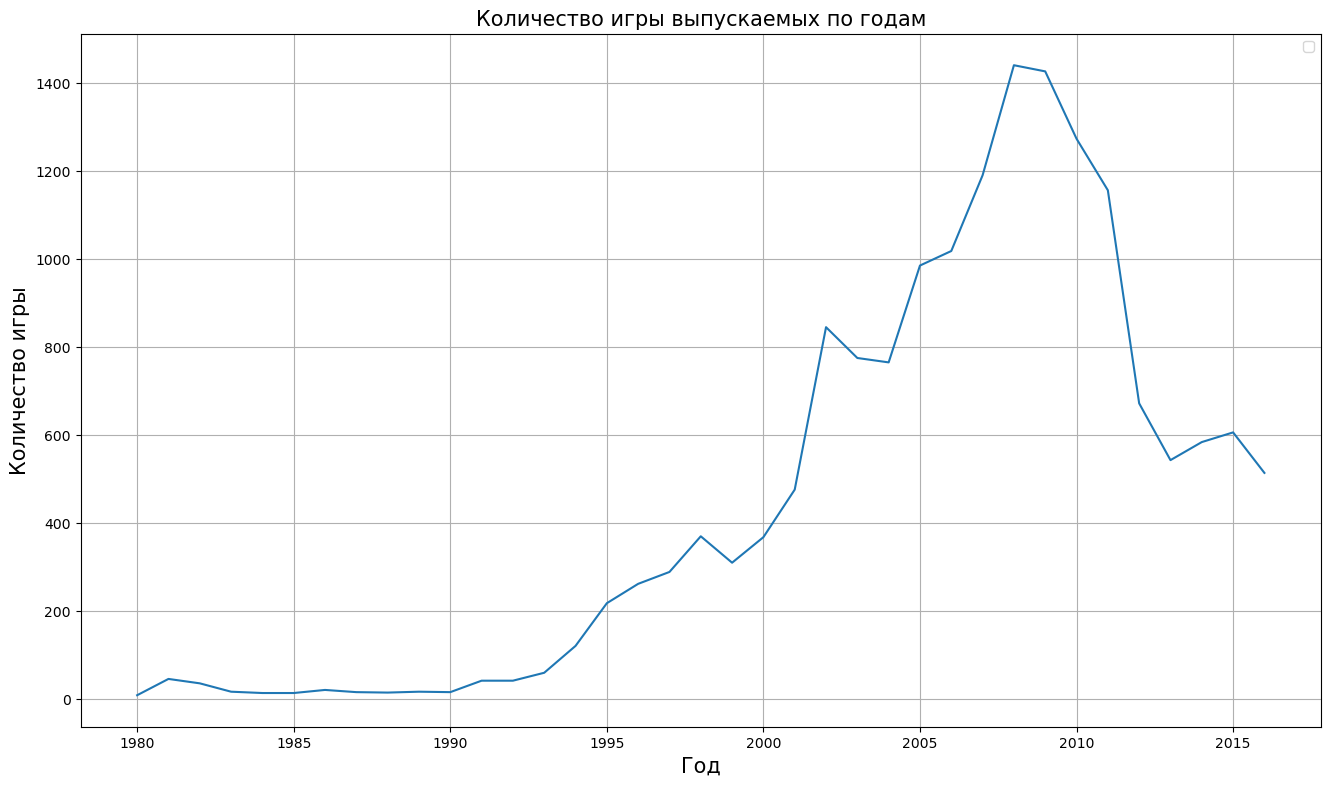

In [36]:
(data
 .pivot_table(
     index='year_of_release', 
     values='name', 
     aggfunc='count')
 .plot.line(grid=True, figsize=(16, 9)))
plt.xlabel('Год', fontsize=15)
plt.ylabel('Количество игры', fontsize=15)
plt.title('Количество игры выпускаемых по годам', fontsize=15)
plt.legend('');

С 1980 до 1990 годов все стаблильно, после идет резкий рости, скорее всего связанный с увеличением допступности устройств и развитием рынка. Падения на 2000, 2005, 2013 годах, может быть связанно с закатом какой-либо старой платформы и выпуском новой.

Важны данные за все периоды, поскольку даже до 1990 года были огромные продажи у некоторых игр.

In [37]:
data.query('year_of_release <= 1985').sort_values(by='sales', ascending=False)

C:\Users\gizza\AppData\Local\Temp\ipykernel_13024\3273004263.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data.query('year_of_release <= 1985').sort_values(by='sales', ascending=False)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,<NA>,NaN,unknown,28.31
89,pac-man,2600,1982,puzzle,7.28,0.45,0.00,0.08,<NA>,NaN,unknown,7.81
240,pitfall!,2600,1981,platform,4.21,0.24,0.00,0.05,<NA>,NaN,unknown,4.50
262,asteroids,2600,1980,shooter,4.00,0.26,0.00,0.05,<NA>,NaN,unknown,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...
8738,pressure cooker,2600,1982,action,0.14,0.01,0.00,0.00,<NA>,NaN,unknown,0.15
9094,krull,2600,1982,action,0.13,0.01,0.00,0.00,<NA>,NaN,unknown,0.14
9486,realsports volleyball,2600,1981,sports,0.12,0.01,0.00,0.00,<NA>,NaN,unknown,0.13
14468,alter ego,pc,1985,simulation,0.00,0.03,0.00,0.01,59,5.8,t,0.04


### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

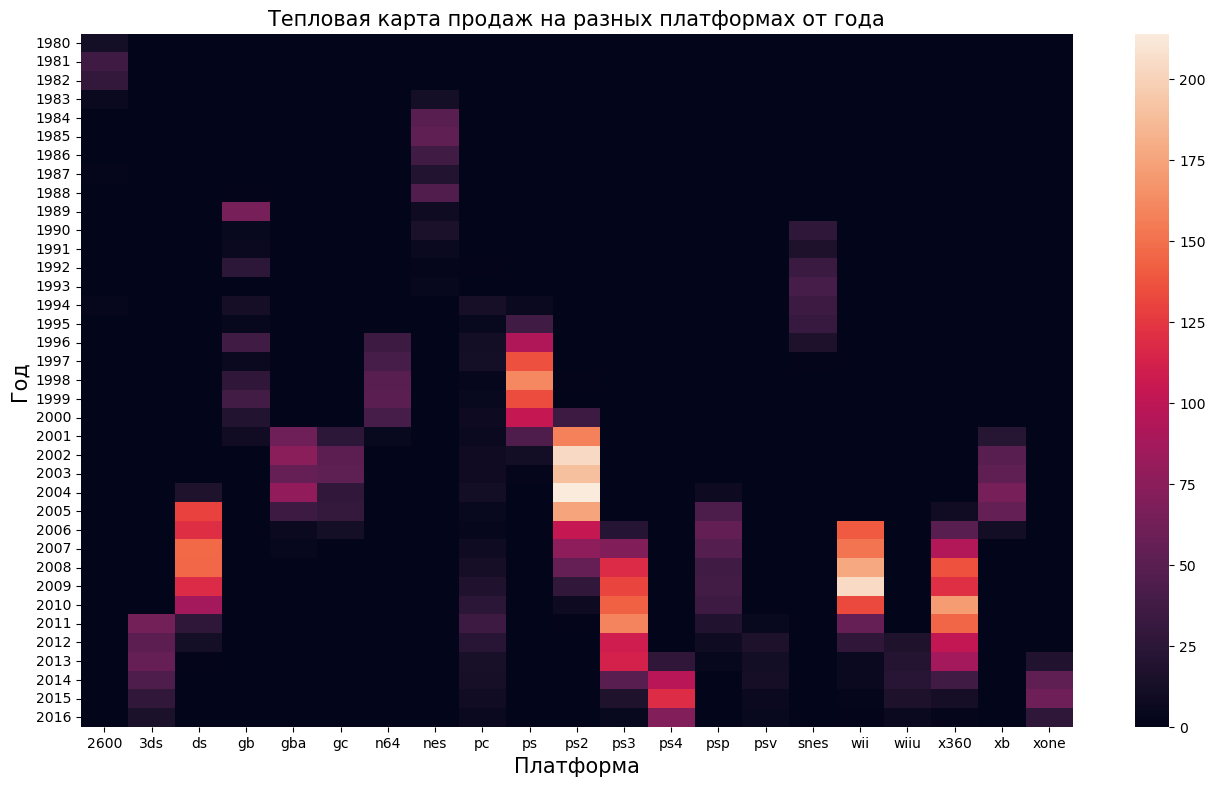

In [38]:
# Сохраним названия платформ топа по продажам для этого создадим сводную таблицу и отсортируем ее по убыванию
most_saled_platform = (data
 .pivot_table(index='platform',
              values='sales', 
              aggfunc='sum')
 .sort_values(by='sales', 
              ascending=False)
 .query('sales > 50')).index

# Выберем данные по этим платформам
platform_year = (data
                 .query('platform in @most_saled_platform')
                 .pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
                 .fillna(0))

plt.figure(figsize=(16, 9))
sns.heatmap(platform_year)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Год', fontsize=15)
plt.title('Тепловая карта продаж на разных платформах от года', fontsize=15);

Поскольку до 1994 года был огромная конкуренция на рынке, а после этого было стабильно 2-3 конкурента, поэтому будет ориентироваться на период после 1994 года и сделаем срез данных и построим снова тепловую карту для некоторых платформ

C:\Users\gizza\AppData\Local\Temp\ipykernel_13024\2658243827.py:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('year_of_release >= 1994')


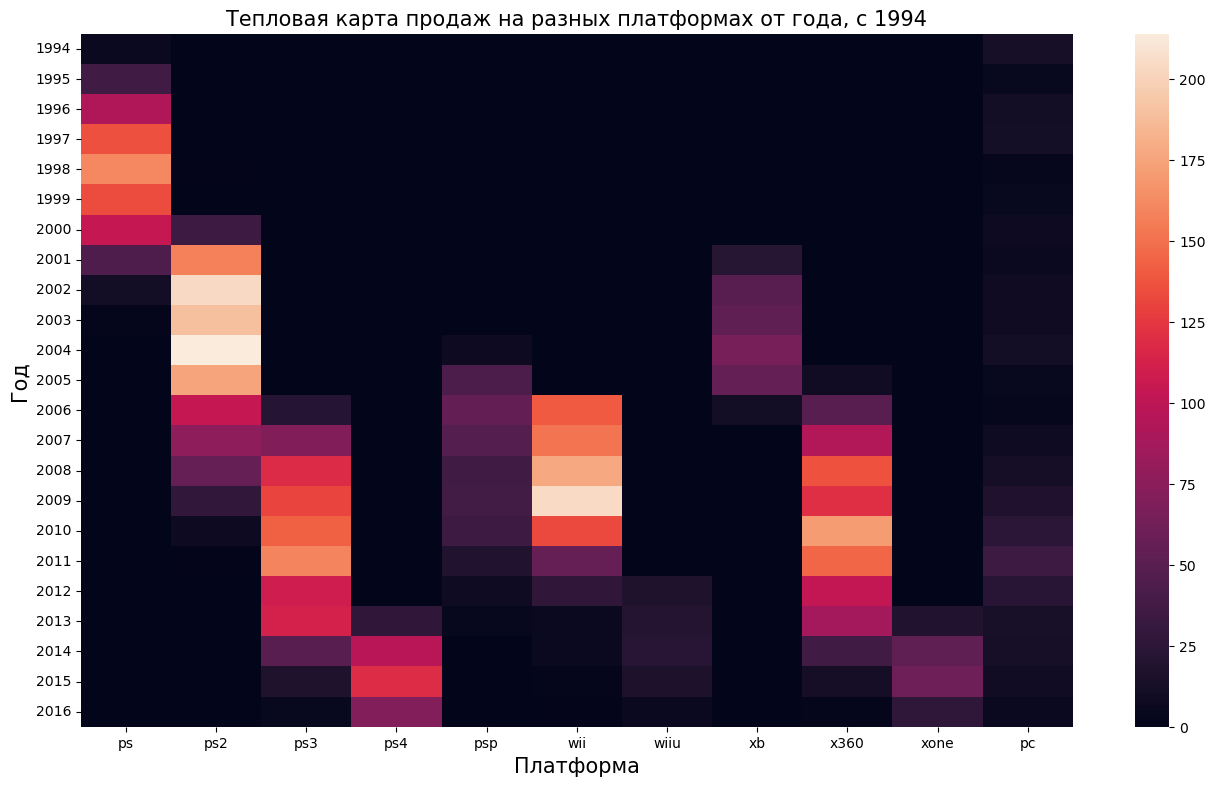

In [39]:
plt.figure(figsize=(16, 9))
sns.heatmap(platform_year
            .query('year_of_release >= 1994')
            .loc[:, ['ps', 'ps2', 'ps3', 'ps4', 'psp', 'wii', 'wiiu', 'xb', 'x360','xone', 'pc']])
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Год', fontsize=15)
plt.title('Тепловая карта продаж на разных платформах от года, с 1994', fontsize=15);

Выберем платформы у которых продаж уже нет и посчитаем среднее

In [40]:
ls = ['ps', 'ps2', 'ps3', 'psp', 'wii', 'wiiu', 'xb', 'x360']
year_diff = []

for s in ls:
    current = list(platform_year.loc[platform_year[s] > 0].index)
    year_diff.append(current[len(current) - 1] - current[0])

year_diff.sort()
sum(year_diff) / len(year_diff)

12.5

**Примерно за 12 лет одна платформа заменяется другой**

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Мы установили, что срок жизни одной платформы это 11 лет, поэтому возьмем года с выпуска последних актуальных платформ это 2013 год.

Рассмотрим поподробнее динамику продаж с 2013 года

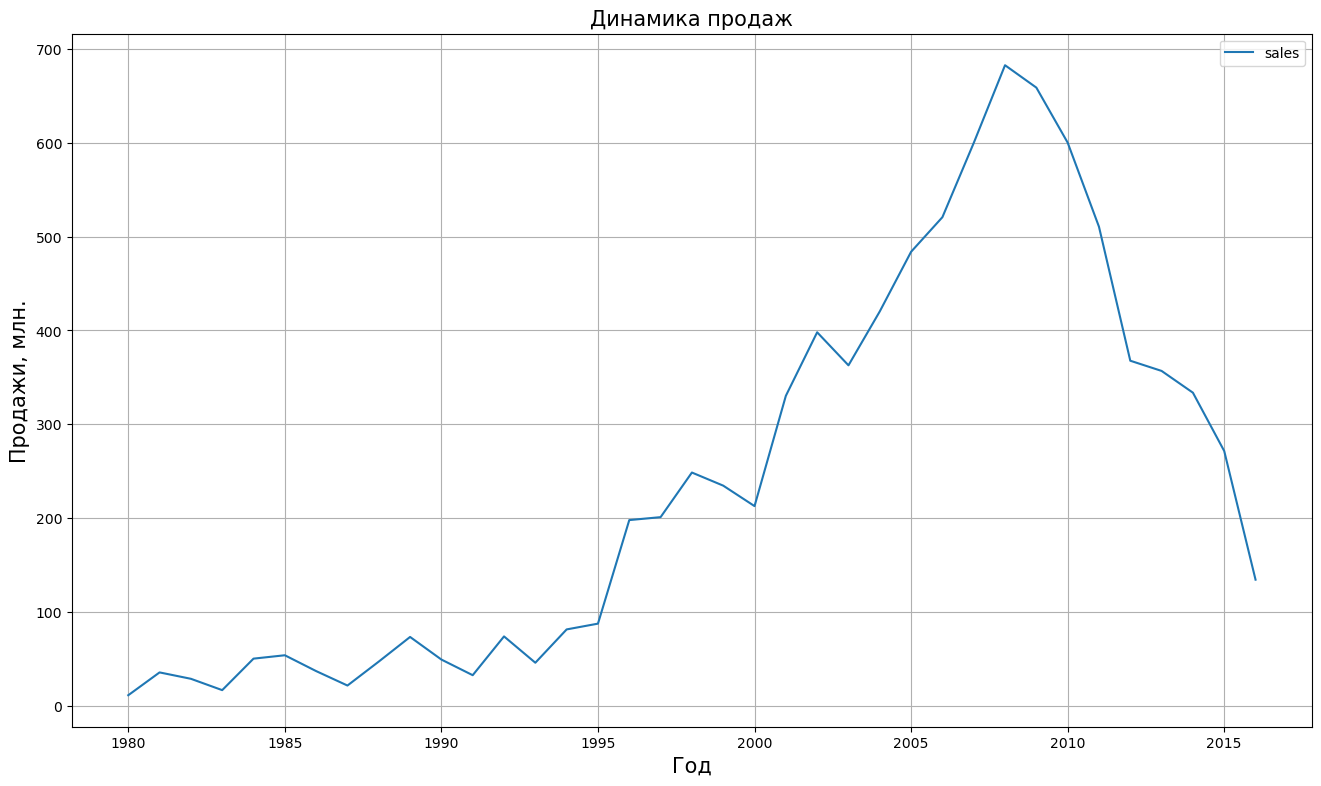

In [41]:
(data
 .pivot_table(index='year_of_release', values='sales', aggfunc='sum')
 .plot(grid=True,figsize=(16, 9)));
plt.xlabel('Год', fontsize=15)
plt.ylabel('Продажи, млн.', fontsize=15)
plt.title('Динамика продаж', fontsize=15);

С 2013 года идет падение продаж, которая отражает динамику с 2008 года, поэтому для построенния прогноза на 2017 год, стоит выбрать период с 2013 до 2016 года.

In [42]:
data_actual = data.query('year_of_release >= 2013')
data_actual['platform'].unique()

C:\Users\gizza\AppData\Local\Temp\ipykernel_13024\1821644330.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data_actual = data.query('year_of_release >= 2013')


array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Не учитывайте в работе данные за предыдущие годы.

In [43]:
data_actual.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)

,sales
platform,
ps4,314.14
ps3,182.97
xone,159.32
3ds,143.43
x360,137.11
wiiu,64.77
pc,42.26
psv,32.99
wii,13.85


За этот период самые прибыльные платформы это `ps4`, `ps3`, `xone`, `3ds`, `wiiu`, `pc` и `x360`

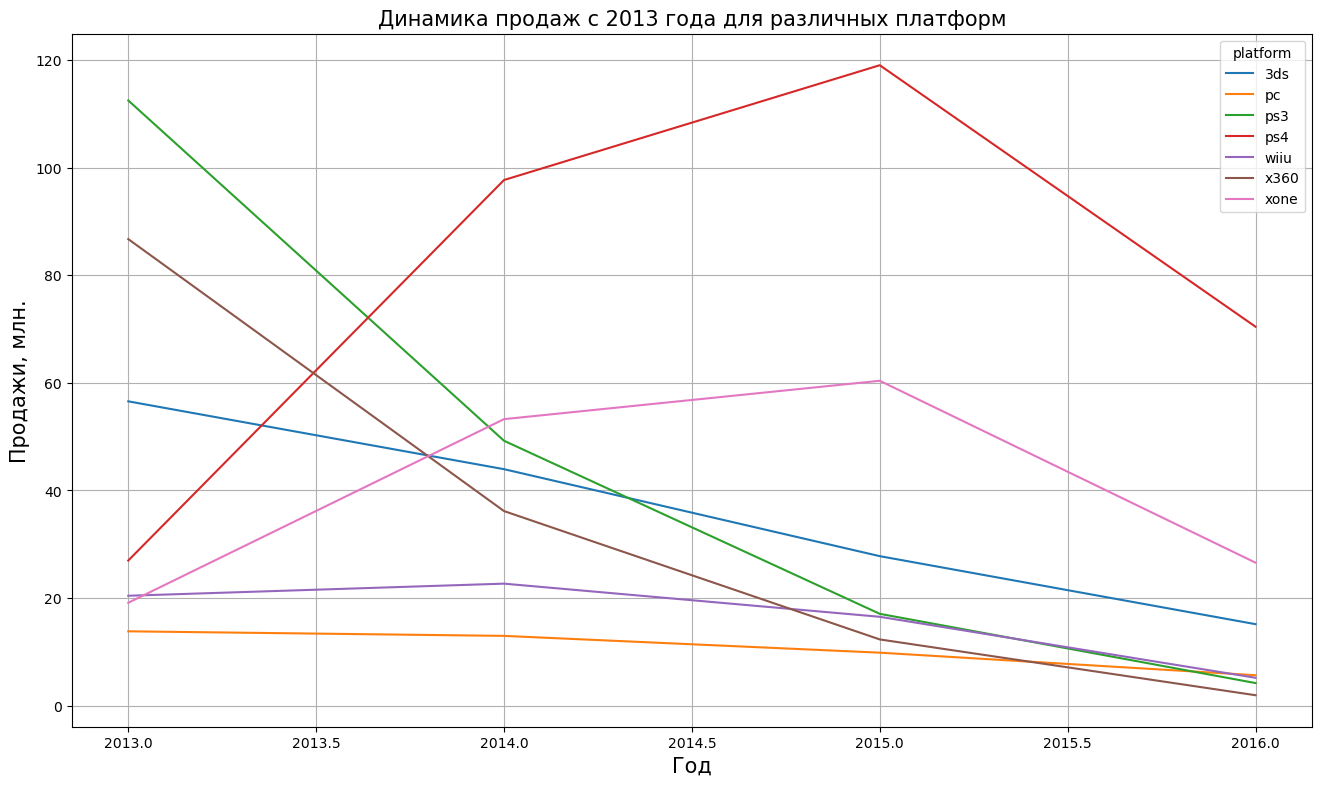

In [44]:
actual_platform = ['ps4', 'ps3', 'x360', 'pc', 'xone', 'wiiu', '3ds']

(data_actual.query('platform in @actual_platform')
 .pivot_table(index='year_of_release', columns='platform', 
              values='sales', aggfunc='sum')
.plot(grid=True, 
      figsize=(16, 9)));
plt.xlabel('Год', fontsize=15)
plt.ylabel('Продажи, млн.', fontsize=15)
plt.title('Динамика продаж с 2013 года для различных платформ', fontsize=15);

Как можно заметить для новых платформ, как `ps4` и `xone`, идет резкое падение продаж после 2015 года, это может быть связано с тем, что данные предоставлены по годам и до декабря 2016 и некоторая часть продаж не опубликована в общий доступ и поэтому эта часть отсутствует в общей таблице.

Для остальных платформ идет резкое падение связанное с захватом рынка новыми платформами.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

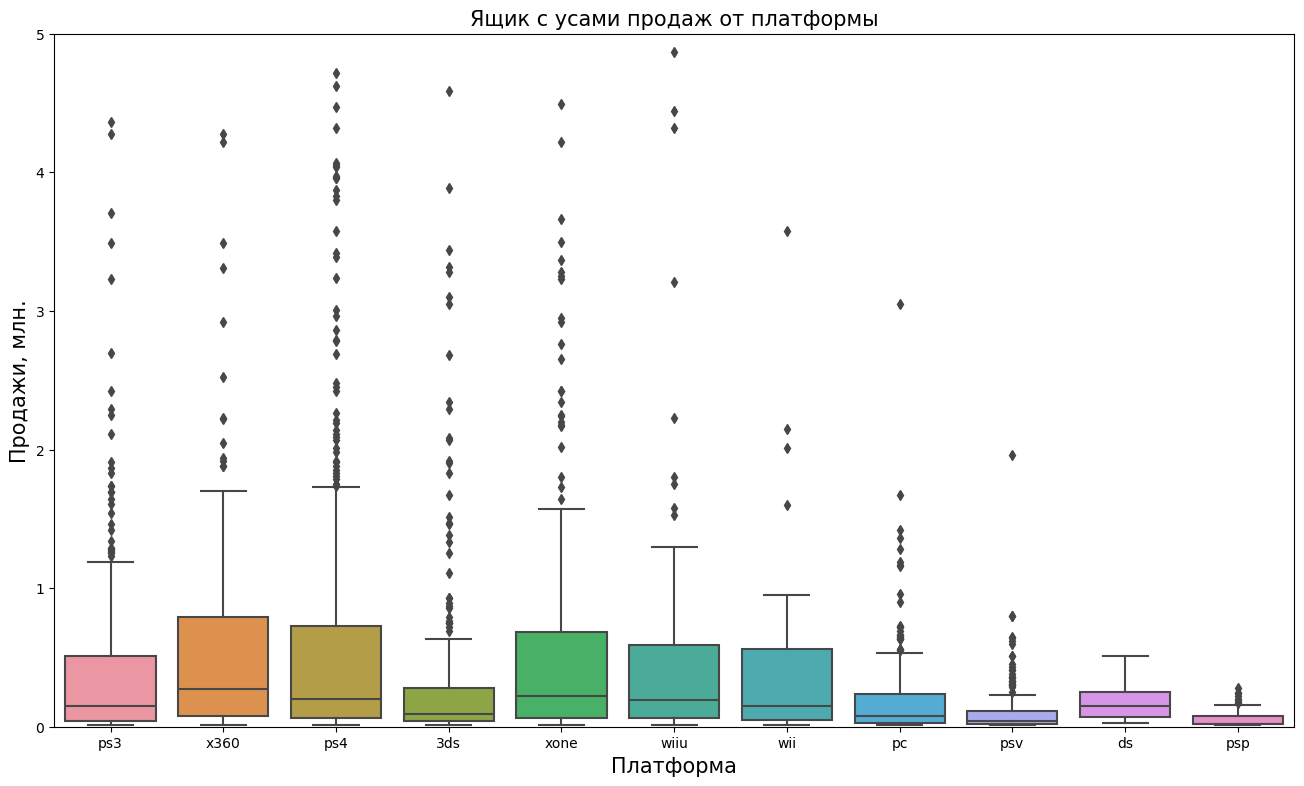

In [45]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=data_actual['platform'], y=data_actual['sales'])
plt.ylim(0, 5)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Продажи, млн.', fontsize=15)
plt.title('Ящик с усами продаж от платформы', fontsize=15);

Присутствует огромное количество выбросов, скорее всего связанных с очень популярными играми, из-за этого верхние границы очень сильно смещены относительно квартилей, кроме `psv`, `ds`, `psp`, поскольку это уже не популярные платформы и соответственно выбросов у них меньше

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Выберем платформу `ps4`, поскольку в выбранном диапазоне годов у нее самые большие продажи, но также рассмотрим количество выпущенных игр на каждой платформе, чтоб была большая статистка.

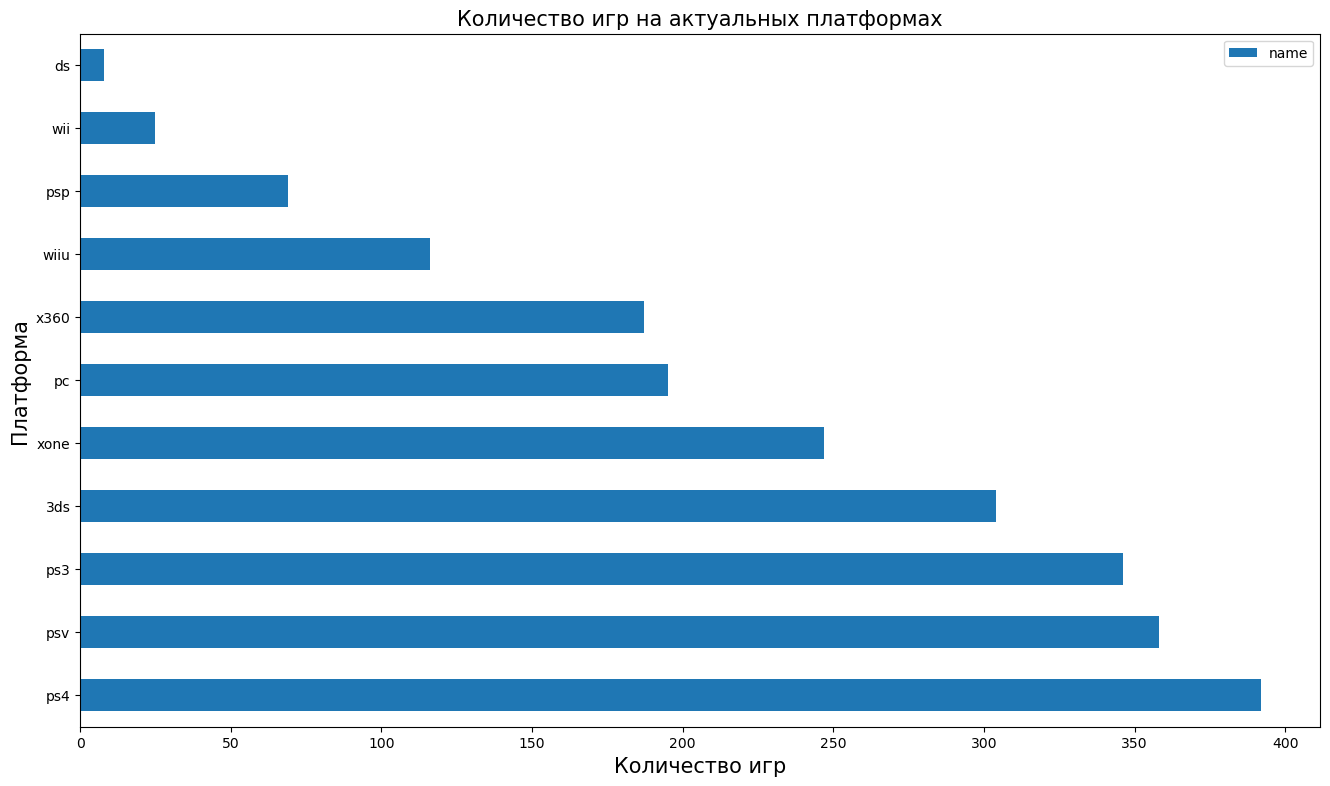

In [46]:
(data_actual
 .pivot_table(index='platform', values='name', aggfunc='count')
 .sort_values(by='name', ascending=False).plot.barh(figsize=(16, 9)))

plt.ylabel('Платформа', fontsize=15)
plt.xlabel('Количество игр', fontsize=15)
plt.title('Количество игр на актуальных платформах', fontsize=15);

Самые большие продажи и больше всего игры на платформе `ps4`, поэтому выберем ее для дальнейшего исследования.

Напишем функию, которая рассчитывает коэф. корреляции и строить матрицу рассеяния

In [47]:
def corr_sales_platform(data, name):
    data_actual_pl = data_actual.query('platform == @name')[['sales', 'critic_score', 'user_score']]
    data_actual_pl = data_actual_pl.dropna()
    
    plt.figure(figsize=[21, 9])
    plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=1.0, 
                    bottom= 0.27, 
                    wspace= 0.2, 
                    hspace=0.5)
    
    plt.subplot(1, 2, 1)
    plt.scatter(data_actual_pl['critic_score'], data_actual_pl['sales'])
    plt.xlabel('Оценки критиков', fontsize=15)
    plt.ylabel('Продажи, млн.', fontsize=15)
    plt.title('Зависимость продаж от отзывов критиков на ' + name.upper(), fontsize=15)
    
    plt.subplot(1, 2, 2)
    plt.scatter(data_actual_pl['user_score'], data_actual_pl['sales'])
    plt.xlabel('Оценки пользователей', fontsize=15)
    plt.ylabel('Продажи, млн.', fontsize=15)
    plt.title('Зависимость продаж от отзывов пользователей на ' + name.upper(), fontsize=15)

In [48]:
def corr_table(data, name):
    data_actual_pl = data_actual.query('platform == @name')[['sales', 'critic_score', 'user_score']]
    data_actual_pl = data_actual_pl.dropna()
    print(name.upper())
    display(data_actual_pl.corr())

PS4


,sales,critic_score,user_score
sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


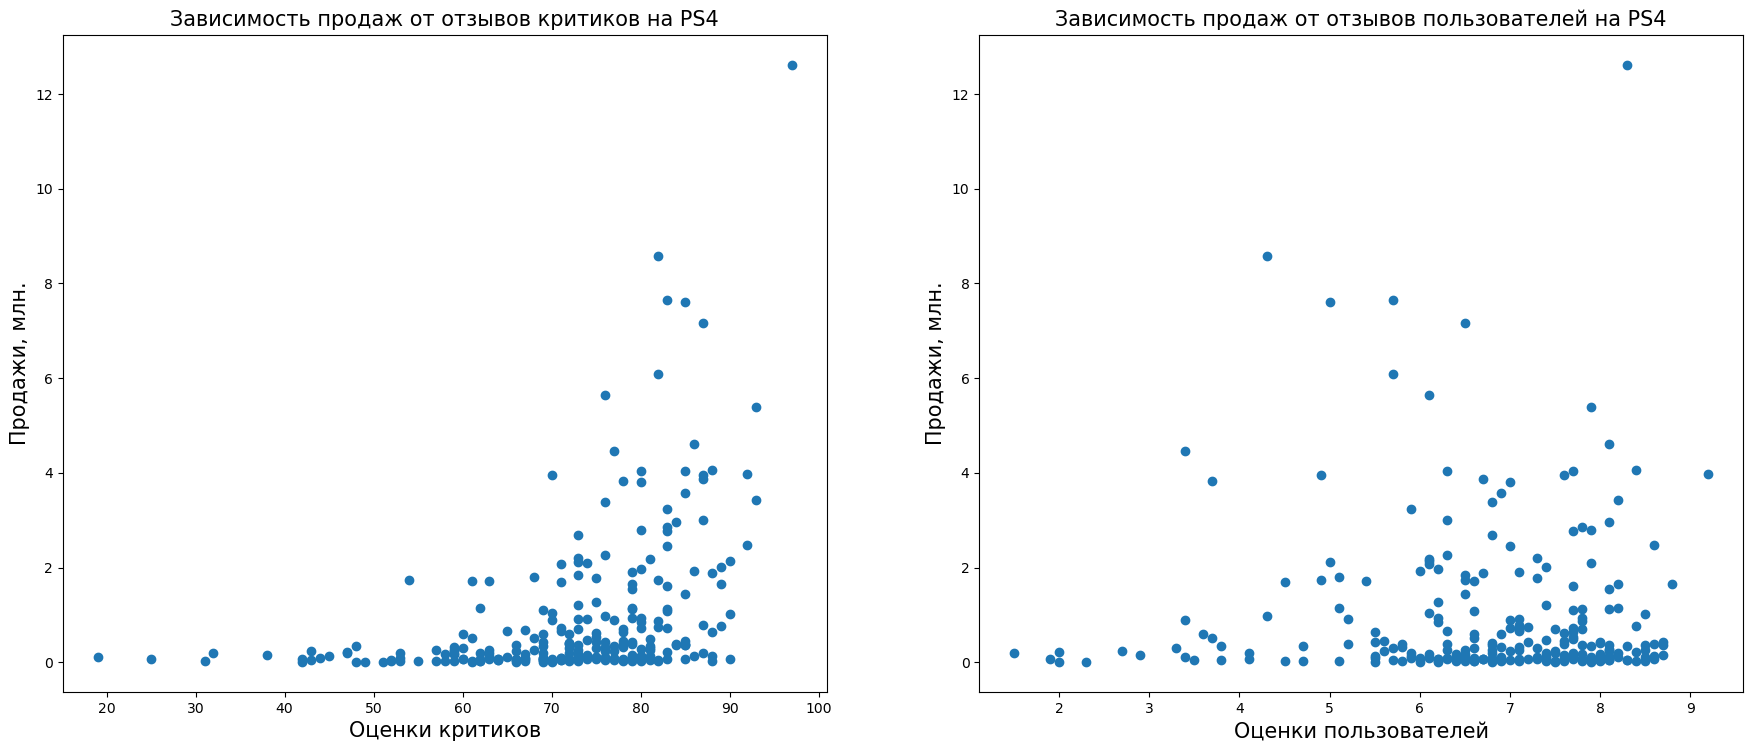

In [49]:
corr_sales_platform(data_actual, 'ps4')
corr_table(data_actual, 'ps4')

- Оценки критиков влияют на продажи, с увеличением оценки продажи растут

- Оценки пользователей не сильно влиют на продажи даже при относительно малых значениях присутствуют большие продажи

- Оценки критиков весомо влияют на оценки пользователей

Отсюда, можно заключить, что **мнение критиков влияют на оба показателя прямо пропорционально**

### Соотнесите выводы с продажами игр на других платформах.

Выберем из актуальных платформ

In [50]:
platforms = actual_platform
platforms.pop(0)
platforms

['ps3', 'x360', 'pc', 'xone', 'wiiu', '3ds']

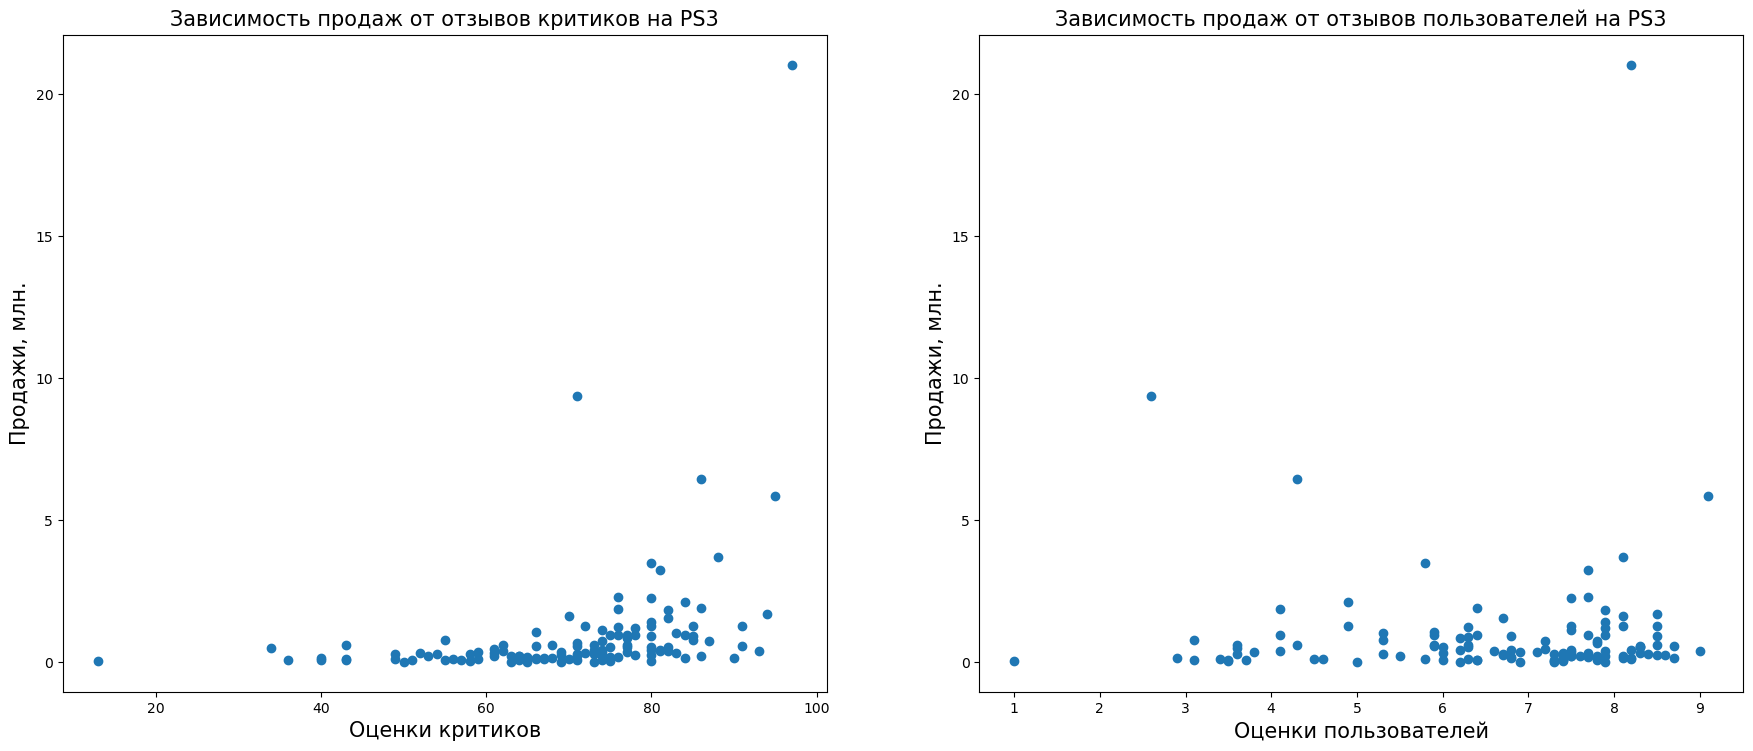

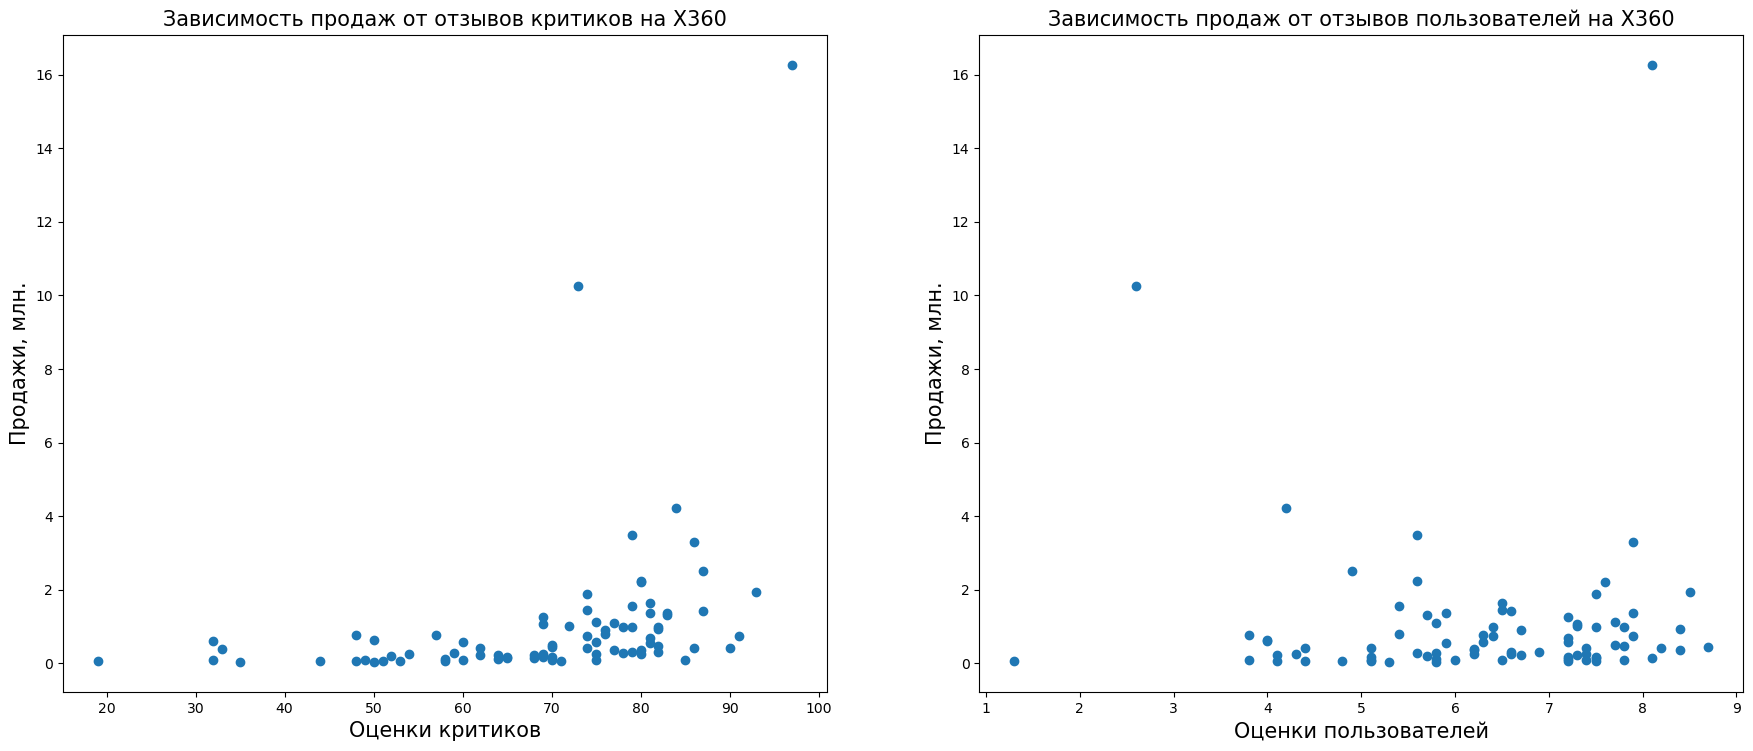

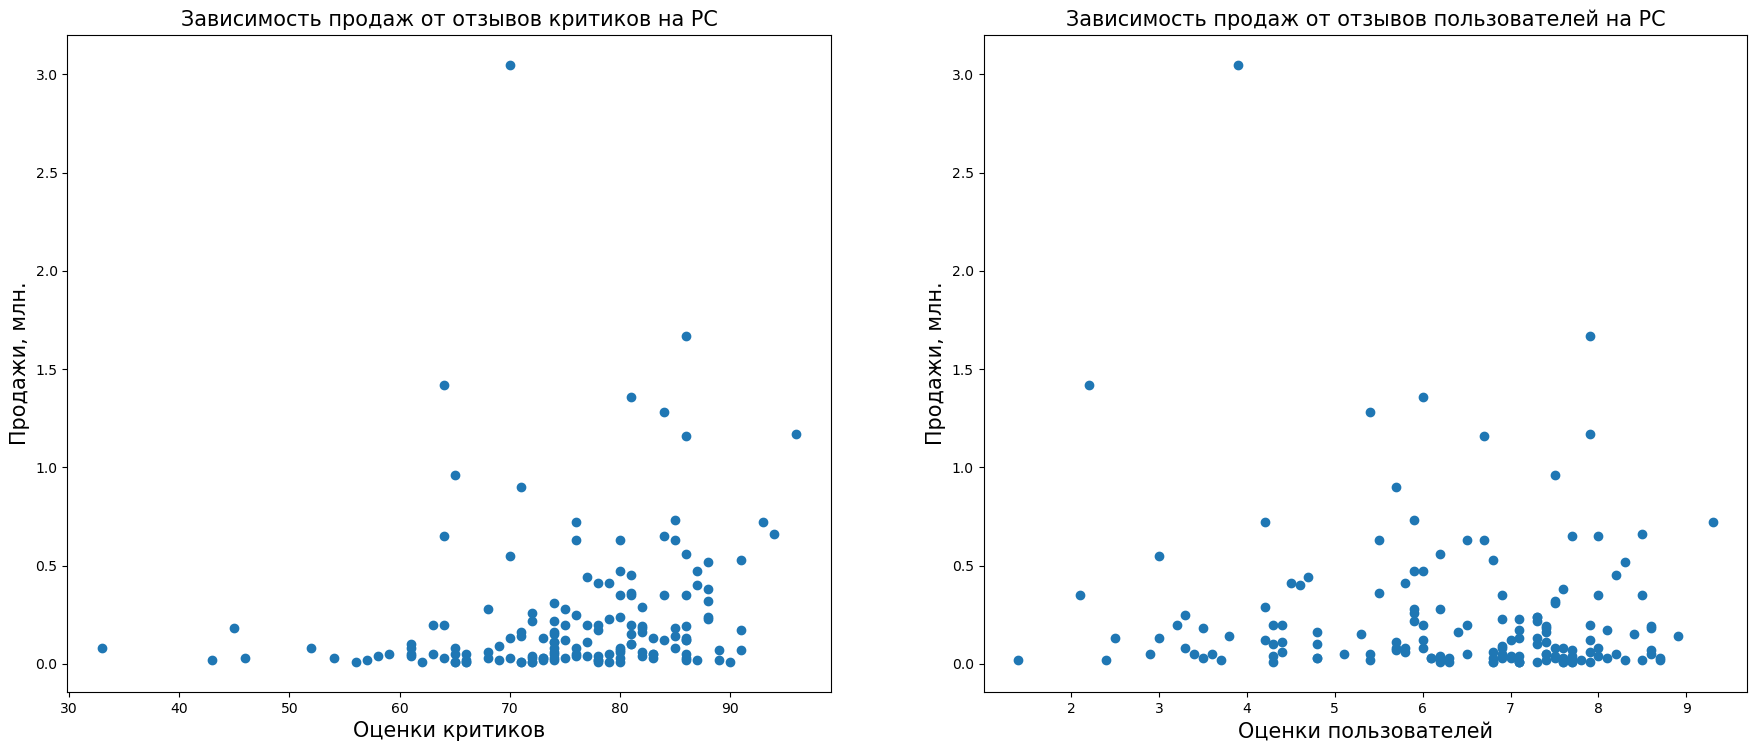

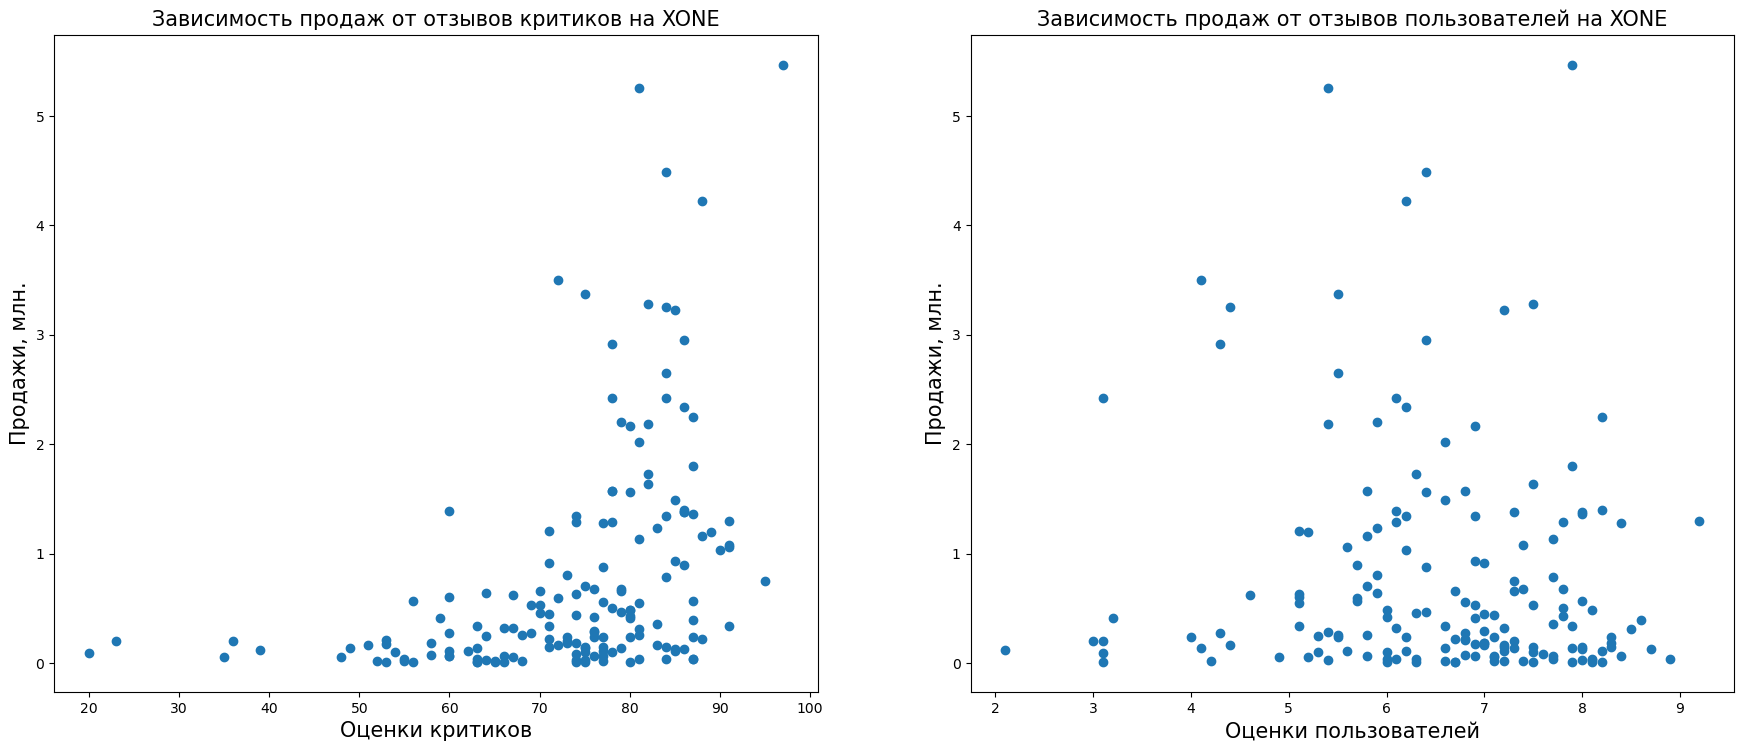

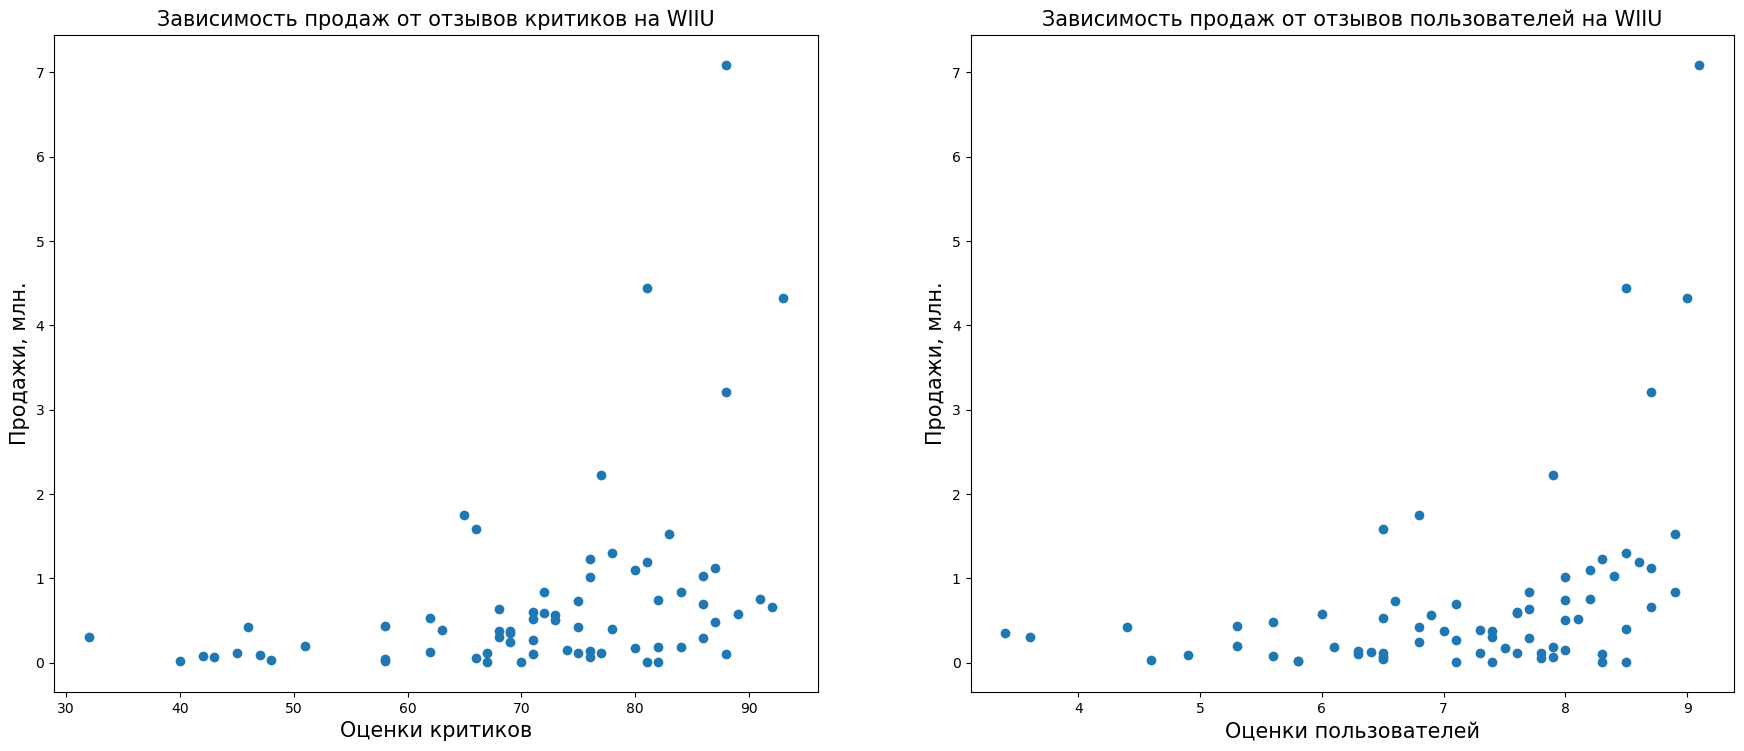

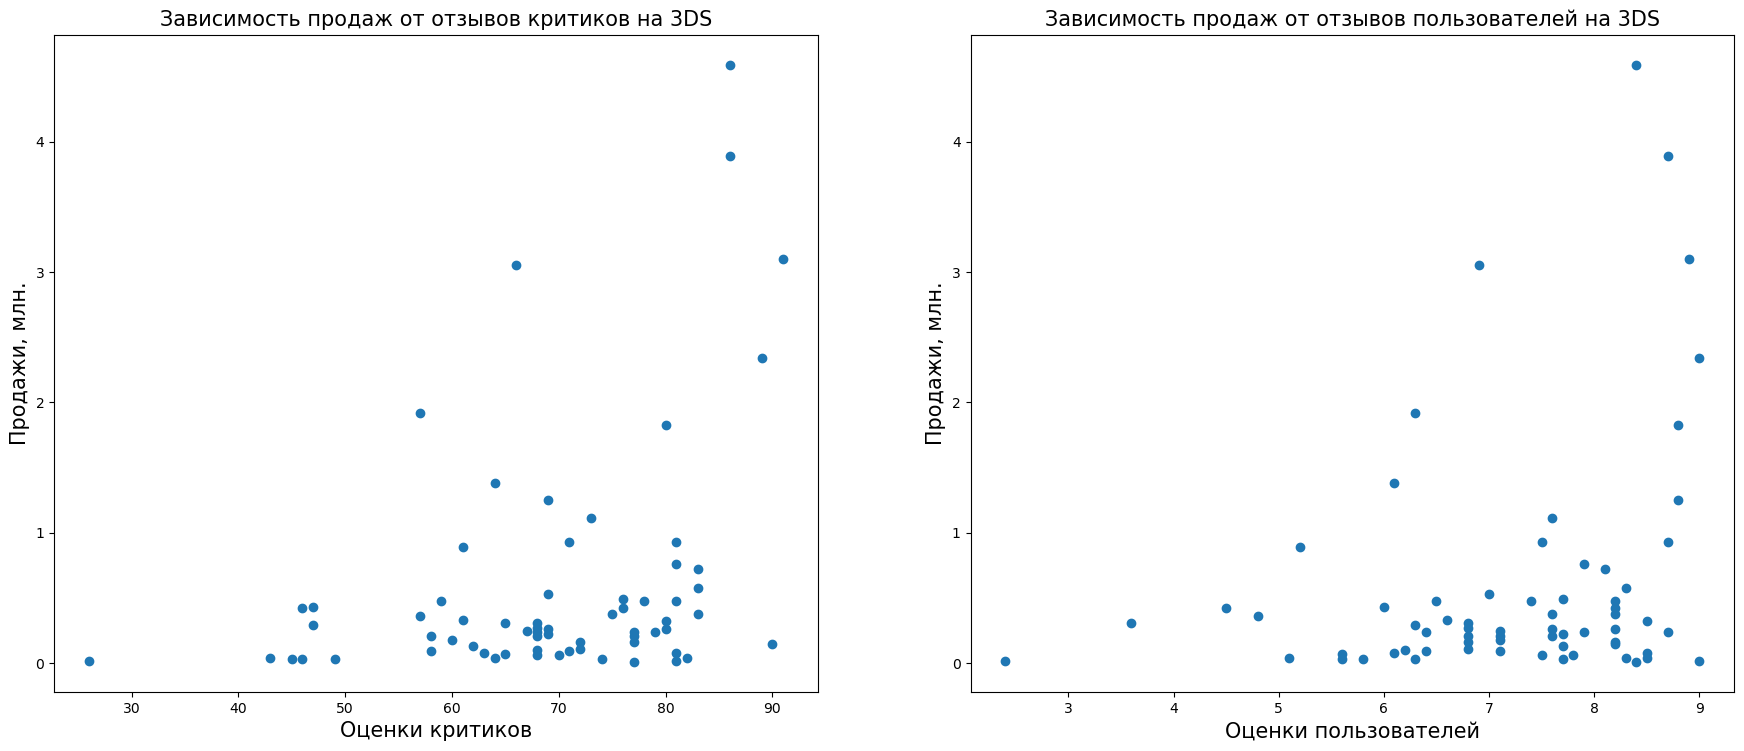

In [51]:
for s in platforms:
    corr_sales_platform(data_actual, s)

In [52]:
for s in platforms:
    corr_table(data_actual, s)

PS3


,sales,critic_score,user_score
sales,1.000000,0.334569,0.022781
critic_score,0.334569,1.000000,0.598546
user_score,0.022781,0.598546,1.000000


X360


,sales,critic_score,user_score
sales,1.000000,0.345182,-0.007946
critic_score,0.345182,1.000000,0.522374
user_score,-0.007946,0.522374,1.000000


PC


,sales,critic_score,user_score
sales,1.000000,0.192085,-0.090341
critic_score,0.192085,1.000000,0.426514
user_score,-0.090341,0.426514,1.000000


XONE


,sales,critic_score,user_score
sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


WIIU


,sales,critic_score,user_score
sales,1.000000,0.376100,0.411715
critic_score,0.376100,1.000000,0.714932
user_score,0.411715,0.714932,1.000000


3DS


,sales,critic_score,user_score
sales,1.000000,0.339235,0.272990
critic_score,0.339235,1.000000,0.769536
user_score,0.272990,0.769536,1.000000


**Можно заключить, что мнение критиков влияет на продажи, также оценки игроков практически не влияют на продажи игр для большинства платформ. Для `3DS` `WIIU`, присутствует корреляция между оценками игроков и продажами, причина наверное в том, что на этих платформах отличная целевая аудитория, которая не смотрит на оценки критиков**

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

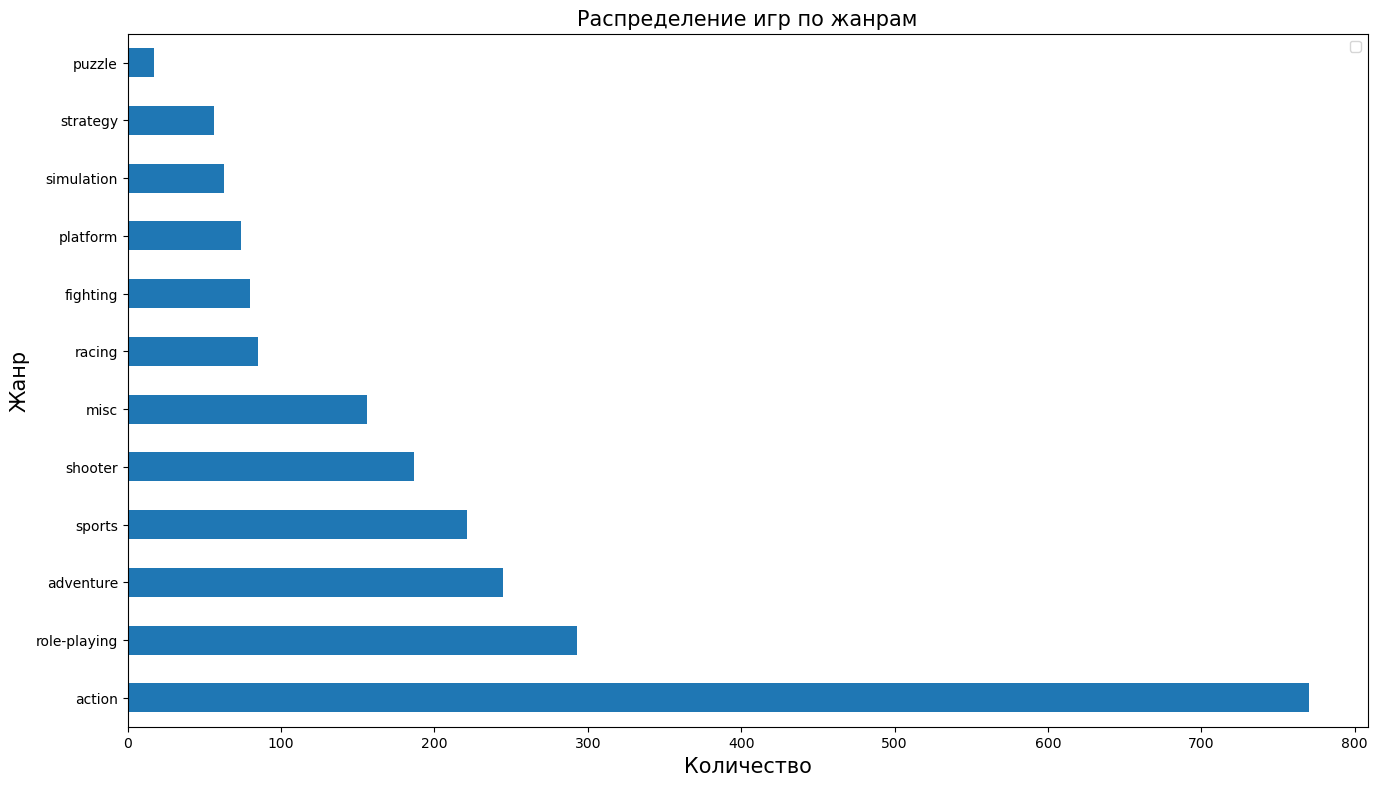

In [53]:
(data_actual
 .pivot_table(index='genre', values='name', aggfunc='count')
 .sort_values(by='name', ascending=False)
 .plot.barh(figsize=(16, 9)))
plt.legend('')
plt.title('Распределение игр по жанрам', fontsize=15)
plt.ylabel('Жанр', fontsize=15)
plt.xlabel('Количество', fontsize=15);

Самые популярные жанры это 
1. Экшен
2. Ролевые игры
3. Приключение

Теперь посмотрим на продажи игр по жанрам, для этого возьмем медиану продаж по каждому жанру и построим столбцовую диаграмму

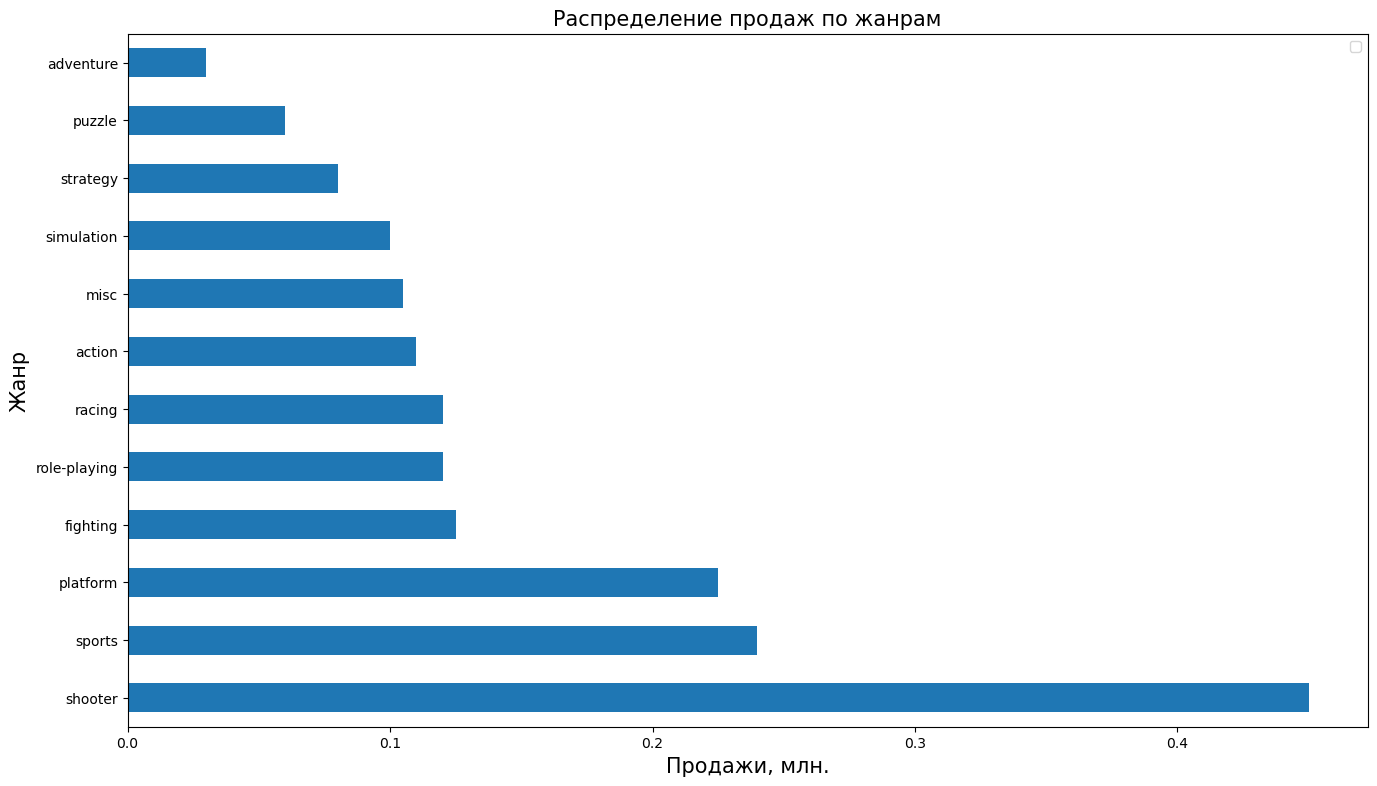

In [54]:
(data_actual
 .pivot_table(index='genre', values='sales', aggfunc='median')
 .sort_values(by='sales', ascending=False)
 .plot.barh(figsize=(16, 9)))
plt.legend('')
plt.title('Распределение продаж по жанрам', fontsize=15)
plt.ylabel('Жанр', fontsize=15)
plt.xlabel('Продажи, млн.', fontsize=15);

Получется такая картина

1. Экшен игр больше всего, но это не самый прибыльный жанр игр
2. Шутеры по продажам на первом месте, хоть и количество игр весомо меньше, чем Экшен
3. Такая же тендеция как с Шутерами для спортивных игр
4. Выпускается очень много игр в жанре Приключение, но у них самые маленькие продажи
5. Остальные жанры по количеству игр и по продажам примерно на одном уровне
 
Скорее всего большинсту игр присуще несколько жанром, а поскольку в наших данных только один, то шутеры также частично можно отнести к жанру экшен

In [55]:
data_actual.query('genre =="shooter"').sort_values(by='sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73,2.6,m,10.24
69,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71,2.6,m,9.36
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,m,7.66
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,<NA>,NaN,unknown,7.39
154,destiny,ps4,2014,shooter,2.49,2.07,0.16,0.92,76,6.1,t,5.64
171,uncharted 4: a thief's end,ps4,2016,shooter,1.85,2.50,0.19,0.85,93,7.9,t,5.39
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81,5.4,m,5.26
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84,6.4,t,4.49


**Самые большие продажи у игр серии call of duty, поэтому скорее всего игр в жанре шутеры выпускается меньше, из-за большой конкуренции на рынке**

### Промежуточные выводы:
1. С 1980 до 1990 годов все стаблильно, после идет резкий рости, скорее всего связанный с увеличением допступности устройств и развитием рынка. Падения на 2000, 2005, 2013 годах, может быть связанно с закатом какой-либо старой платформы и выпуском новой. Важны данные за все периоды, поскольку даже до 1990 года были огромные продажи у некоторых игр.
2. Примерно за 11 лет одна платформа заменяется другой
3. С 2013 года идет падение продаж, которая отражает динамику с 2008 года, поэтому для построенния прогноза на 2017 год, стоит выбрать период с 2013 до 2016 года.
4. За период с 2013 самые прибыльные платформы это `ps4`, `ps3`, `xone`, `3ds`, `wiiu`, `pc` и `x360`. Для новых платформ, как `ps4` и `xone`, и `pc` идет резкое падение продаж после 2015 года, это может быть связано с тем, что данные предоставлены по годам и до декабря 2016 и некоторая часть продаж не опубликована в общий доступ и поэтому эта часть отсутствует в общей таблице. Для остальных платформ идет резкое падение связанное с захватом рынка новыми платформами.
5. На ящике с усами присутствует огромное количество выбросов, скорее всего связанных с очень популярными играми, из-за этого верхние границы очень сильно смещены относительно квартилей, кроме `psv`, `ds`, `psp`, поскольку это уже не популярные платформы и соответственно выбросов у них меньше
6. Влияение оценок на продажи
    - Оценки критиков влияют на продажи, с увеличением оценки продажи растут

    - Оценки пользователей не сильно влиют на продажи даже при относительно малых значениях присутствуют большие продажи

    - Оценки критиков весомо влияют на оценки пользователей
    
    Отсюда, можно заключить, что **мнение критиков влияют на оба показателя прямо пропорционально**
7. Влияние оценок на других платформах, **можно заключить, что мнение критиков влияет на продажи, также оценки игроков практически не влияют на продажи игр для большинства платформ. Для `3DS` `WIIU`, присутствует корреляция между оценками игроков и продажами, причина наверное в том, что на этих платформах отличная целевая аудитория, которая не смотрит на оценки критиков**
8. Продажи игр по жанрам:
    - Экшен игр больше всего, но это не самый прибыльный жанр игр
    - Шутеры по продажам на первом месте, хоть и количество игр весомо меньше, чем Экшен
    - Такая же тендеция как с Шутерами для спортивных игр
    - Выпускается очень много игр в жанре Приключение, но у них самые маленькие продажи
    - Остальные жанры по количеству игр и по продажам примерно на одном уровне
    
    Скорее всего большинсту игр присуще несколько жанром, а поскольку в наших данных только один, то шутеры также частично можно отнести к жанру экшен. **Самые большие продажи у игр серии call of duty, поэтому скорее всего игр в жанре шутеры выпускается меньше, из-за большой конкуренции на рынке**

## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для этого напишем функцию, которая будет строить круговые диаграммы из сводной таблицы

In [56]:
data['rating'].unique()

array(['e', 'unknown', 'm', 't', 'e10+'], dtype=object)

В рейтинге всего 5 значений, поэтому не будем добавлять доли продаж `others`

In [57]:
def region_pie(s):
    plt.figure(figsize=[16, 10])
    plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=1.0, 
                    bottom= 0.27, 
                    wspace= 0.5, 
                    hspace=0.5)
    
    plt.subplot(1, 3, 1)
    data1 = data_actual.pivot_table(index='platform', values=s, aggfunc='sum').sort_values(by=s, ascending=False).reset_index()
    data2 = data1.head()
    df2 = pd.DataFrame({'platform': ['others'], s: [data1.loc[5:, s].sum()]})
    data2 = pd.concat([data2, df2])
    data2 = data2.sort_values(by=s, ascending=False)
    
    plt.pie(data2[s], labels=data2['platform'], autopct='%.1f%%')
    plt.title('Соотношение продаж на различных платформах', fontsize=10)
    
    plt.subplot(1, 3, 2)
    data1 = data_actual.pivot_table(index='genre', values=s, aggfunc='sum').sort_values(by=s, ascending=False).reset_index()
    data2 = data1.head()
    df2 = pd.DataFrame({'genre': ['others'], s: [data1.loc[5:, s].sum()]})
    data2 = pd.concat([data2, df2])
    data2 = data2.sort_values(by=s, ascending=False)
    
    plt.pie(data2[s], labels=data2['genre'], autopct='%.1f%%')
    plt.title('Соотношение продаж для различных жанров', fontsize=10)
    
    plt.subplot(1, 3, 3)
    data1 = data_actual.pivot_table(index='rating', values=s, aggfunc='sum').sort_values(by=s, ascending=False).reset_index()
    
    plt.pie(data1[s], labels=data1['rating'], autopct='%.1f%%')
    plt.title('Соотношение продаж для различных рейтингов', fontsize=10)
    plt.show();

### Северная Америка

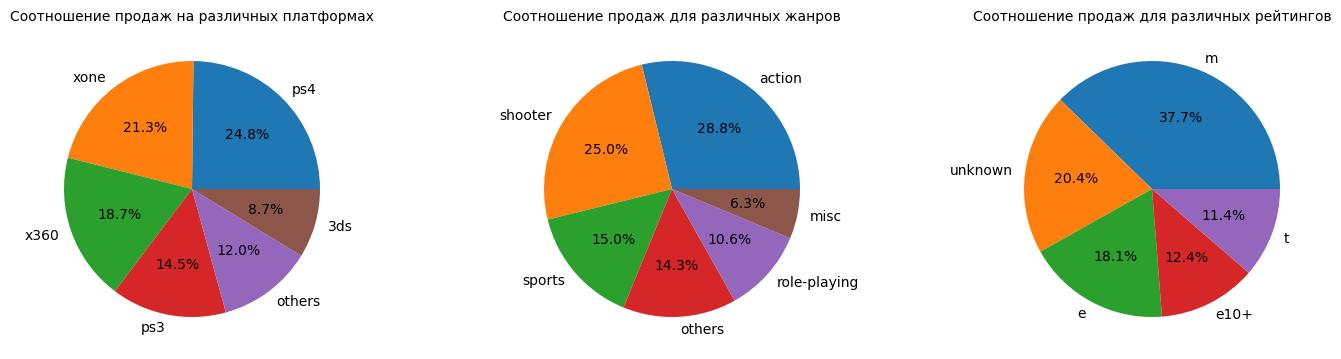

In [58]:
region_pie('na_sales')

Для NA:
- Самая популярные платформы:
    1. `ps4`
    2. `xone`
    3. `x360`
    4. `ps3`
    5. `others`
    6. `3ds`

Самые большие доли продаж у актуальных на то время платформ, как `ps4`, `xone`, уже после идут предыдущее поколение этих консолей `others`, `3ds`. Такие доли продаж вызваны захватом рынка новых платформ и заката старых.

- Самые популярные жанры:
    1. Action
    2. Shooter
    3. Sports
    4. Others
    5. Role-playing
    6. Misc
    
Самые большие доли продаж у экшен и шутеров различающихся на 4 порядка, дальше спорт. Предположительно, такое соотношение вызвано целевой аудиторией взрослых людей, поскольку большая доля продаж идет на рейтинг M

ESRB. Рейтинг существенно влияет на продажи в данном регионе, практически половина продаж это игры с рейтинг M, после уже рейтинг E.

### Европа

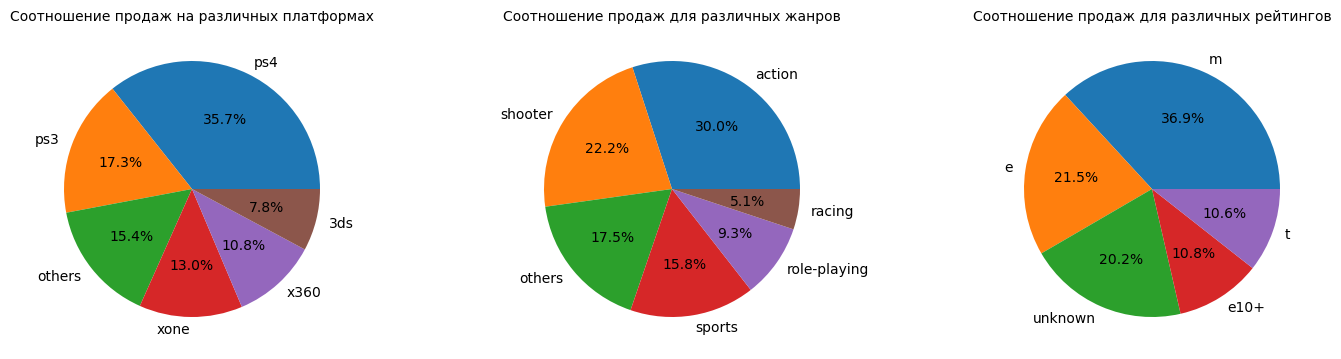

In [59]:
region_pie('eu_sales')

Для EU:
- Самая популярные платформы:
    1. `ps4`
    2. `ps3`
    3. `others`
    4. `xone`
    5. `x360`
    6. `3ds`

Самые большие доли продаж у актуальных на то время платформ, как `ps4`, `ps3`, уже после идут `others`, `xone`, `x360` и `3ds`. Такие доли продаж вызваны скорее всего более поздним выходом новых платформ в этом регионе и большей стоимости из-за курса евро или в данном регионе больше фанатов одной платформы Playstation.

- Самые популярные жанры:
    1. Action
    2. Shooter
    3. Others
    4. Sports
    5. Role-playing
    6. racing
    
Такая же тендеция как в Северной Америке и причина скорее всего таже самая, но различие в последнем жанре, в Европе преобладает еще гоночные игры, скорее всего из-за проведения чемпионатов по автогонкам и более развитой культуры автоспорта в этом регионе.

ESRB. Такое же соотношения как в Северной Америке, основная доля продаж это игры рейтинга M, а после E

### Япония

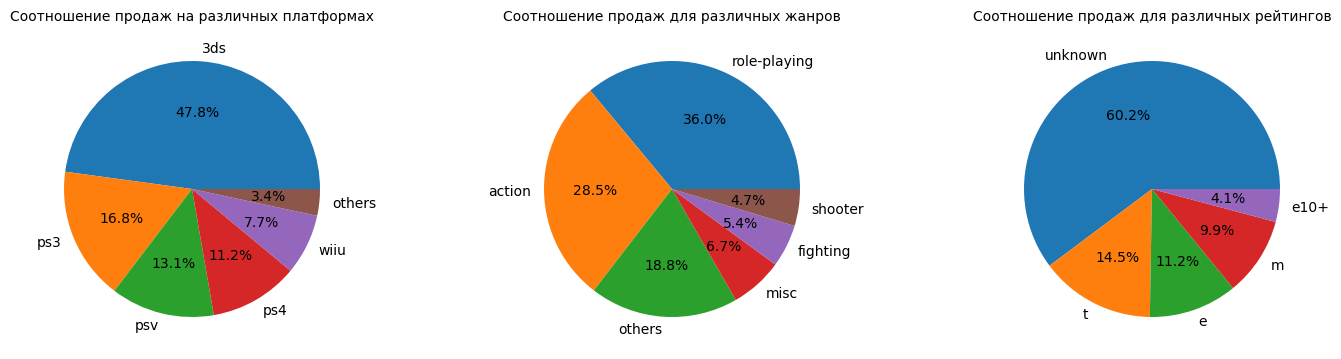

In [60]:
region_pie('jp_sales')

Для JP:
- Самая популярные платформы:
    1. `3ds`
    2. `ps3`
    3. `psv`
    4. `ps4`
    5. `wiiu`
    6. `others`

Половина доли продаж в это регионе на платформе `3ds`, и в топе присутствуют только японские платформы, что весьма логично.

- Самые популярные жанры:
    1. Role-playing
    2. Action
    3. Other
    4. Misc
    5. Fighting
    6. Shooter
    
В данном регионе соотношения резко отличаются чем в остальных, в Японии преоблодают ролеплейные игры и экшен. Скорее всего из-за того, что в Японии целевая аудитория моложе чем в Северной Америке и Европе, доля продаж приходится на другие жанры игр.

ESRB. В Японии, основная доля продаж приходятся на неизвестный рейтинг, после идут игры для подростков, всех возрастов и для взрослых, скорее всего такое соотношение вызвано популярностью одной платформы `3ds` на которую издают игры с таким рейтингом. Такая тендеция вызвана тем, что рейтинг ESRB работает в Северной Америке и видимо самые продаваемые японские игры, не имеют ESRB.

### Портрет пользователя каждого региона

Для Северной Америки:
- Основные платформы в будущем `PS4` и `XONE`
- Основные жанры `Action` `Shooter`
- Целевая аудитория взрослые люди

Для Европы:
- Основные платформы в будущем `PS4` и `XONE`
- Основные жанры `Action` `Shooter`
- Целевая аудитория взрослые люди

Для Японии:
- Основные платформы в будущем `PS4` или новая япоская консоль
- Основные жанры `Role-playing` и `Action`
- Целевая аудиторию не определить из-за отсутствия рейтнга ESRB для игр издаваемых в этом регионе

## Проверка гипотез.

Вначале напишем фунцию проверяющую pvalue и зададим уровень стат. значимости

In [61]:
alpha = .05
def pvalue(result):
    print(result.pvalue)
    
    if result.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Возьмем из общей таблицы интересующие нас выборки

In [62]:
pc = data_actual.query('platform == "pc"')['user_score'].dropna()
xone = data_actual.query('platform == "xone"')['user_score'].dropna()

Построим графикнормальной вероятности для определения "нормальности" наших выборок

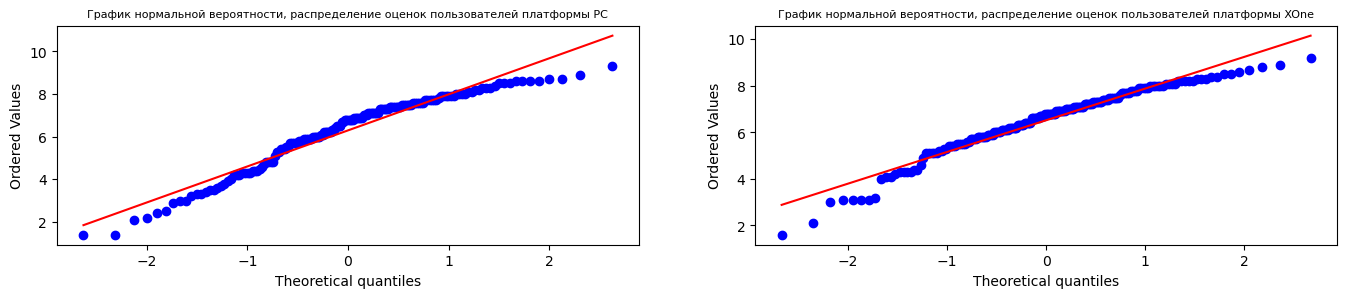

In [63]:
plt.figure(figsize=(16,3))

plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=1.0, 
                    bottom= 0.27, 
                    wspace= 0.2, 
                    hspace=0.5)

plt.subplot(121)
st.probplot(pc, dist="norm", plot=plt)
plt.title('График нормальной вероятности, распределение оценок пользователей платформы PC', fontsize=8)

plt.subplot(122)
st.probplot(xone, dist="norm", plot=plt)
plt.title('График нормальной вероятности, распределение оценок пользователей платформы XOne', fontsize=8)

plt.show()

In [64]:
print("Количество значений оценок XOne:", xone.count())
print("Количество значений оценок PC:", pc.count())
print('Var XOne', xone.var())
print('Var PC', pc.var())

Количество значений оценок XOne: 182
Количество значений оценок PC: 161
Var XOne 1.9069968429360702
Var PC 2.966531055900622


Исходя из графиков и количества значений, можно сказать что распределения этих двух выборок распределены нормально, соответственно можно применить Т-тест 

$H_0$ - средние пользовательские оценки равны на обеих платформах

$H_1$ - средние пользовательские оценки не равны на обеих платформах

Поскольку у нас две выборки данных не зависят друг от друга используем `st.ttest_ind`, и установим `equal_var=False`, поскольку var обоих выборок сильно различаются

In [65]:
result = st.ttest_ind(pc.to_list(), xone.dropna().to_list(), equal_var=False)
pvalue(result)

0.18276378779141825
Не получилось отвергнуть нулевую гипотезу


 **Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, нельзя отвергнуть**

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Аналогично как в первом задании

In [66]:
action = data_actual.query('genre == "action"')['user_score'].dropna()
sports = data_actual.query('genre == "sports"')['user_score'].dropna()

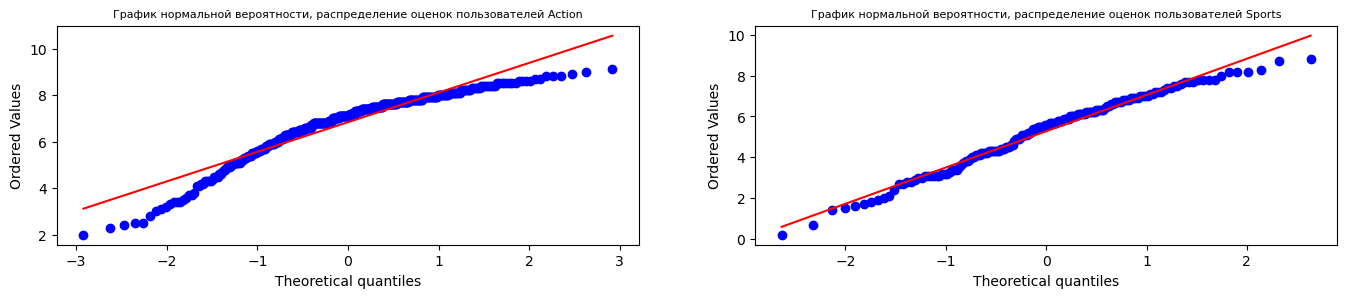

In [67]:
plt.figure(figsize=(16,3))

plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=1.0, 
                    bottom= 0.27, 
                    wspace= 0.2, 
                    hspace=0.5)

plt.subplot(121)
st.probplot(action, dist="norm", plot=plt)
plt.title('График нормальной вероятности, распределение оценок пользователей Action', fontsize=8)

plt.subplot(122)
st.probplot(sports, dist="norm", plot=plt)
plt.title('График нормальной вероятности, распределение оценок пользователей Sports', fontsize=8)

plt.show()

In [68]:
print("Количество значений оценок Action:", action.count())
print("Количество значений оценок Sports:", sports.count())
print('Var Action', action.var())
print('Var Sports', sports.var())

Количество значений оценок Action: 393
Количество значений оценок Sports: 164
Var Action 1.762670717141816
Var Sports 3.161210160107736


Исходя из графиков и количества значений, можно сказать что распределения этих двух выборок распределены нормально, соответственно можно применить Т-тест 

$H_0$ - средние пользовательские оценки равны для обоих жанров

$H_1$ - средние пользовательские оценки не равны на обоих жанров

Поскольку у нас две выборки данных не зависят друг от друга используем `st.ttest_ind` и установим equal_var=False, поскольку var обоих выборок сильно различаются

In [69]:
result = st.ttest_ind(action.to_list(), sports.to_list(), equal_var=False)
pvalue(result)

2.6403461029522193e-20
Отвергаем нулевую гипотезу


**Гипотеза о том, что средние пользовательские оценки для жанров Action и Sports различаются, нельзя отвергнуть**

## Заключение

**Обработка данных**
- Все названия столбцов были переведены в нижний регистр, и названия соответствует содержанию
- `year_of_release` была переведена в int тип, поскольку у нас есть информация только о годе выпуска
- `critic_score` был переведен тоже в int, поскольку оценка идет по 100 балльной шкале и нет десятичных значений
- Были обработаны неявные дубликаты
- были удалены пустые строки
- object колонки были переведены в нижний регистр
- добавлена колонка с общими продажами

**Причина пропусков**
1. Пустые строки связаны с ошибкой при выгрузке данных
2. В других случаях пропуски присутствуют в колонках `critic_score`, `user_score` и `rating`, тоже из-за ошибки при выгрузке, либо малоизвестная игра и поэтому нет оценок пользователей и критиков.

Отработка дубликатов не требуется, поскольку в таблице присутствуют разные версии игр на разных платформах.

**Причина не заполнения пропусков**

Основная причина в том, что при заполнении медианой или ср. значеним в `critic_score`,`user_score` и `rating` наиболее вероятным очень сильно измениться распределение, поскольку количество пропусков весомое.

**Исследовательский анализ данных**

**Примерно за 12 лет одна платформа заменяется другой**

- Влияение оценок на продажи для большинства актуальных платформ
    - Оценки критиков влияют на продажи, с увеличением оценки продажи растут

    - Оценки пользователей не сильно влиют на продажи даже при относительно малых значениях присутствуют большие продажи

    - Оценки критиков весомо влияют на оценки пользователей
    
    **Можно заключить, что мнение критиков влияет на продажи, также оценки игроков практически не влияют на продажи игр для большинства платформ. Для `3DS` `WIIU`, присутствует корреляция между оценками игроков и продажами, причина наверное в том, что на этих платформах отличная целевая аудитория, которая не смотрит на оценки критиков**

- Продажи игр по жанрам:
    - Экшен игр больше всего, но это не самый прибыльный жанр игр
    - Шутеры по продажам на первом месте, хоть и количество игр весомо меньше, чем Экшен
    - Такая же тендеция как с Шутерами для спортивных игр
    - Выпускается очень много игр в жанре Приключение, но у них самые маленькие продажи
    - Остальные жанры по количеству игр и по продажам примерно на одном уровне
    
    Скорее всего большинсту игр присуще несколько жанром, а поскольку в наших данных только один, то шутеры также частично можно отнести к жанру экшен. **Самые большие продажи у игр серии call of duty, поэтому скорее всего игр в жанре шутеры выпускается меньше, из-за большой конкуренции на рынке**

**Портрет пользователя каждого региона**

Для Северной Америки:
- Основные платформы в будущем `PS4` и `XONE`
- Основные жанры `Action` `Shooter`
- Целевая аудитория взрослые люди

Для Европы:
- Основные платформы в будущем `PS4` и `XONE`
- Основные жанры `Action` `Shooter`
- Целевая аудитория взрослые люди

Для Японии:
- Основные платформы в будущем `PS4` или новая япоская консоль
- Основные жанры `Role-playing` и `Action`
- ESRB. В Японии, основная доля продаж приходятся на неизвестный рейтинг, после идут игры для подростков, всех возрастов и для взрослых, скорее всего такое соотношение вызвано популярностью одной платформы `3ds` на которую издают игры с таким рейтингом. Такая тендеция вызвана тем, что рейтинг ESRB работает в Северной Америке и видимо самые продаваемые японские игры, не имеют ESRB.


**Рекламная кампания:**
- После проведения анализа по регионам, можно заключить, что для Европы и Северной Америки основные платформы в будущем: `PS4`, `XOne`, самый прибыльные жанры Экшен и Шутеры (в основном серия Call of Duty) и рейтинг `M`. Поэтому стоит нацелить кампанию на данные платформы и жанры игр.
- В Японии картина совершенно другая, основная платформа это `3DS`, но исходя из долей продаж, можно сказать, что в будущем преоблодающей платформой будет `PS4`, либо другая новая японская консоль, основные жанры ролеплей и экшен, поскольку ERSB нет в Японии у большинства игр нет рейтинга, но кроме игр с неизвестным рейтингом, большую долю продаж занимают `T` и `E`. Исходя из вышеперечисленного сложно составить рекламную кампанию для этого региона на основе имеющихся данных

**Проверка гипотез**
1.  **Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, нельзя отвергнуть**
2. **Гипотеза о том, что средние пользовательские оценки для жанров Action и Sports различаются, нельзя отвергнуть**